In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
df=pd.read_csv("udemy_courses.csv")

**Basic data exploration**

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.level.value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [5]:
##value counts of all level of course
df.level.value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

**Basic Data Cleaning**

In [6]:
##Use LabelEncoder for encoading of is_paid column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['is_paid'] = labelencoder.fit_transform(df['is_paid'])
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [7]:
##Custom LabelEncoder for encoading level column
cleanup_nums = {"level":     {"All Levels": 0, "Beginner Level": 1,"Intermediate Level":2,
                             "Expert Level":3}}
df = df.replace(cleanup_nums)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,2,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,2,2.0,2016-12-13T14:57:18Z,Business Finance


In [8]:
df.isnull().sum()
##no null value in the data set

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [9]:
##showing datatypes of all column
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                  int64
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                    int64
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [10]:
df.is_paid.value_counts()

1    3368
0     310
Name: is_paid, dtype: int64

In [11]:
df.subject.value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [12]:
df.level.value_counts()

0    1929
1    1270
2     421
3      58
Name: level, dtype: int64

**All Tasks And Answers**

In [13]:
## creating a new column name per_course_total_revenue
df["per_course_total_revenue"]=df["price"]*df["num_subscribers"]

In [14]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,per_course_total_revenue
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18T20:58:58Z,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09T16:34:20Z,Business Finance,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,2,2.5,2016-12-19T19:26:30Z,Business Finance,97830
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30T20:07:24Z,Business Finance,232845
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,2,2.0,2016-12-13T14:57:18Z,Business Finance,255200


In [15]:
##for subject
##Which subject got highest revenue?
df.loc[df['per_course_total_revenue'].idxmax()]
##we see that webdevelopment got highest revenue at about rupees 24316800/-

course_id                                                              625204
course_title                                       The Web Developer Bootcamp
url                         https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                                     1
price                                                                     200
num_subscribers                                                        121584
num_reviews                                                             27445
num_lectures                                                              342
level                                                                       0
content_duration                                                           43
published_timestamp                                      2015-11-02T21:13:27Z
subject                                                       Web Development
per_course_total_revenue                                        

In [16]:
##See all column's unique values
def unique_value(df):
    for column in df:
        print(f'{column}:{df[column].unique()}')

##unique_value(df)        

In [17]:
## All subjects name and their total courses counts
df.subject.value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

**Rvenue differences among all subjects with the help of pie chart**

In [18]:
web=df[df['subject']=="Web Development"]
web_max=web.loc[web['per_course_total_revenue'].idxmax()]

Business_fin=df[df['subject']=="Business Finance"]
Business_fin_max=Business_fin.loc[Business_fin['per_course_total_revenue'].idxmax()]

Musical_Instruments=df[df['subject']=="Musical Instruments"]
Musical_Instruments_max=Musical_Instruments.loc[Musical_Instruments['per_course_total_revenue'].idxmax()]

Graphic_Design=df[df['subject']=="Graphic Design"]
Graphic_Design_max=Graphic_Design.loc[Graphic_Design['per_course_total_revenue'].idxmax()]

##concatination of all this dataframes
revenue_dif=pd.concat([web_max,Business_fin_max,Musical_Instruments_max,Graphic_Design_max],axis=1)
revenue_dif=revenue_dif.T


In [19]:
##Showing the values from high to low
revenue_dif=revenue_dif.sort_values(by=['per_course_total_revenue'],ascending=False)
revenue_dif.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,per_course_total_revenue
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,1,200,121584,27445,342,0,43,2015-11-02T21:13:27Z,Web Development,24316800
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,1,200,75499,7676,362,0,30,2014-08-07T06:27:51Z,Musical Instruments,15099800
1213,820194,Photoshop for Entrepreneurs - Design 11 Practi...,https://www.udemy.com/photoshop-for-entreprene...,1,200,36288,737,63,0,5,2016-06-09T01:57:03Z,Graphic Design,7257600
40,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,1,195,24481,2347,174,0,10,2016-01-21T01:38:48Z,Business Finance,4773795


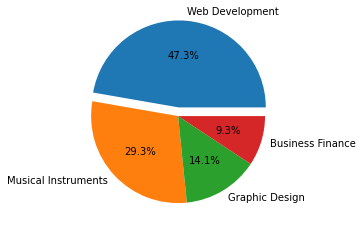

In [20]:
##  plotting pie chart  acoording to max 
suject=['Web Development','Musical Instruments','Graphic Design','Business Finance']
exp=[0.1,0,0,0]
plt.pie(revenue_dif.per_course_total_revenue,labels=suject,autopct='%2.1f%%',explode=exp)
plt.show()

In [21]:
w,b,m,g=df.subject.value_counts()

In [22]:
df.subject.value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [23]:
df['per_course_total_revenue'].dtypes

dtype('int64')

In [24]:
## For Average
web=df[df['subject']=='Web Development']['per_course_total_revenue'].sum()
web=web/w
bus=df[df['subject']=='Business Finance']['per_course_total_revenue'].sum()
bus=b
mus=df[df['subject']=='Musical Instruments']['per_course_total_revenue'].sum()
mus=mus/m
grap=df[df['subject']=='Graphic Design']['per_course_total_revenue'].sum()
grap=grap/g
data=[web,bus,mus,grap]
subject=['Web Development','Business Finance','Musical Instruments','Graphic Design']
index=[0,1,2,3]
q1=pd.DataFrame(data,index)
headers = ["Avg_revenue_per_subject"]
q1.columns = headers
q1['subject']=subject

q1.head()

,Avg_revenue_per_subject,subject
0,525703.145833,Web Development
1,1195.000000,Business Finance
2,78469.198529,Musical Instruments
3,127666.948590,Graphic Design


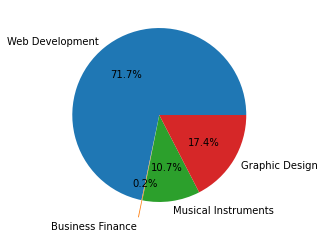

In [25]:
##  plotting pie chart  acoording to Average
suject1=['Web Development','Business Finance','Musical Instruments','Graphic Design']
exp=[0,0.2,0,0]
plt.pie(q1.Avg_revenue_per_subject	,labels=suject1,autopct='%2.1f%%',explode=exp)
plt.show()

**Which course is popular according to reviews and create a graph of that distribution**

In [26]:
## Highest rating course
df.loc[df['num_reviews'].idxmax()]

course_id                                                              625204
course_title                                       The Web Developer Bootcamp
url                         https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                                     1
price                                                                     200
num_subscribers                                                        121584
num_reviews                                                             27445
num_lectures                                                              342
level                                                                       0
content_duration                                                           43
published_timestamp                                      2015-11-02T21:13:27Z
subject                                                       Web Development
per_course_total_revenue                                        

In [27]:
## for counting max
web=df[df['subject']=="Web Development"]
web_review_max=web.loc[web['num_reviews'].idxmax()]

Business_fin=df[df['subject']=="Business Finance"]
Business_review_fin_max=Business_fin.loc[Business_fin['num_reviews'].idxmax()]

Musical_Instruments=df[df['subject']=="Musical Instruments"]
Musical_review_Instruments_max=Musical_Instruments.loc[Musical_Instruments['num_reviews'].idxmax()]

Graphic_Design=df[df['subject']=="Graphic Design"]
Graphic_review_Design_max=Graphic_Design.loc[Graphic_Design['num_reviews'].idxmax()]

##concatination of all this dataframes
review_df=pd.concat([web_review_max,Business_review_fin_max,Musical_review_Instruments_max,Graphic_review_Design_max],axis=1)
review_df=review_df.T

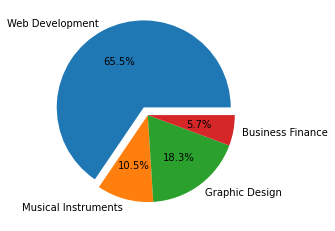

In [28]:
##  plotting pie chart according to max
suject=['Web Development','Musical Instruments','Graphic Design','Business Finance']
exp=[0.1,0,0,0]
plt.pie(review_df.num_reviews,labels=suject,autopct='%2.1f%%',explode=exp)
plt.show()

In [29]:
## For Average
web=df[df['subject']=='Web Development']['num_reviews'].sum()
web=web/w
bus=df[df['subject']=='Business Finance']['num_reviews'].sum()
bus=b
mus=df[df['subject']=='Musical Instruments']['num_reviews'].sum()
mus=mus/m
grap=df[df['subject']=='Graphic Design']['num_reviews'].sum()
grap=grap/g
data=[web,bus,mus,grap]
subject=['Web Development','Business Finance','Musical Instruments','Graphic Design']
index=[0,1,2,3]
q2=pd.DataFrame(data,index)
headers = ["Avg_review_per_subject"]
q2.columns = headers
q2['subject']=subject

q2.head()

,Avg_review_per_subject,subject
0,358.354167,Web Development
1,1195.000000,Business Finance
2,46.652941,Musical Instruments
3,61.475954,Graphic Design


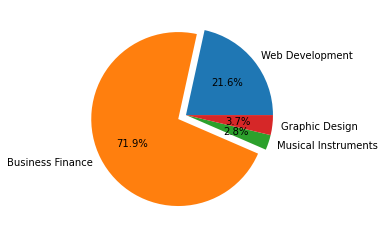

In [30]:
##  plotting pie chart  acoording to Average
suject1=['Web Development','Business Finance','Musical Instruments','Graphic Design']
exp=[0,0.1,0,0]
plt.pie(q2.Avg_review_per_subject,labels=suject1,autopct='%2.1f%%',explode=exp)
plt.show()

**Which course is popular according to subscribers and create a graph of that distribution**

In [31]:
web=df[df['subject']=="Web Development"]
web_sub_max=web.loc[web['num_subscribers'].idxmax()]

Business_fin=df[df['subject']=="Business Finance"]
Business_sub_fin_max=Business_fin.loc[Business_fin['num_subscribers'].idxmax()]

Musical_Instruments=df[df['subject']=="Musical Instruments"]
Musical_sub_Instruments_max=Musical_Instruments.loc[Musical_Instruments['num_subscribers'].idxmax()]

Graphic_Design=df[df['subject']=="Graphic Design"]
Graphic_sub_Design_max=Graphic_Design.loc[Graphic_Design['num_subscribers'].idxmax()]

##concatination of all this dataframes
review_sub=pd.concat([web_sub_max,Business_sub_fin_max,Musical_sub_Instruments_max,Graphic_sub_Design_max],axis=1)
review_sub=review_sub.T

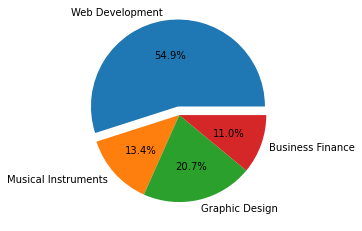

In [32]:
##  plotting pie chart  acoording to max 
suject=['Web Development','Musical Instruments','Graphic Design','Business Finance']
exp=[0.1,0,0,0]
plt.pie(review_sub.num_subscribers,labels=suject,autopct='%2.1f%%',explode=exp)
plt.show()

In [33]:
## For Average
web=df[df['subject']=='Web Development']['num_subscribers'].sum()
web=web/w
bus=df[df['subject']=='Business Finance']['num_subscribers'].sum()
bus=b
mus=df[df['subject']=='Musical Instruments']['num_subscribers'].sum()
mus=mus/m
grap=df[df['subject']=='Graphic Design']['num_subscribers'].sum()
grap=grap/g
data=[web,bus,mus,grap]
subject=['Web Development','Business Finance','Musical Instruments','Graphic Design']
index=[0,1,2,3]
q3=pd.DataFrame(data,index)
headers = ["Avg_subscribers_per_subject"]
q3.columns = headers
q3['subject']=subject

q3.head()

,Avg_subscribers_per_subject,subject
0,6650.476667,Web Development
1,1195.000000,Business Finance
2,1245.130882,Musical Instruments
3,1763.097844,Graphic Design


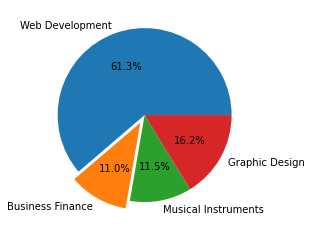

In [34]:
##  plotting pie chart  acoording to Average
suject1=['Web Development','Business Finance','Musical Instruments','Graphic Design']
exp=[0,0.1,0,0]
plt.pie(q3.Avg_subscribers_per_subject,labels=suject1,autopct='%2.1f%%',explode=exp)
plt.show()

**show the relation between course duration and subscribers**

In [35]:
df.corr()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,per_course_total_revenue
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,0.078451,-0.057223,-0.053973
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,-0.033156,0.094417,0.072902
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,-0.073219,0.293450,0.346617
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,-0.062092,0.161839,0.557175
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,-0.055649,0.228889,0.769948
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,-0.102291,0.801647,0.321816
level,0.078451,-0.033156,-0.073219,-0.062092,-0.055649,-0.102291,1.000000,-0.107274,-0.077903
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,-0.107274,1.000000,0.296736
per_course_total_revenue,-0.053973,0.072902,0.346617,0.557175,0.769948,0.321816,-0.077903,0.296736,1.000000


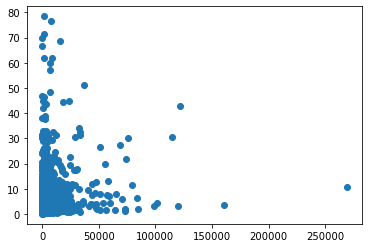

In [36]:
##Correlation coefficient values less than +0.8 or greater than -0.8 are not considered significant.
##scatter plot to show the corelation
plt.scatter(df['num_subscribers'], df['content_duration'])
plt.show()

In [37]:
from scipy.stats import linregress
linregress(df['num_subscribers'], df['content_duration'])
## here p alue is 5.2486796944911873e-23 which is less than 0.05 so relation is significant but so we need to 
## see the r value

LinregressResult(slope=0.00010308643347981602, intercept=3.764934092352409, rvalue=0.16183867741001334, pvalue=5.2486796944911873e-23, stderr=1.0367359669694272e-05)

In [38]:
## Showing in different way
## ρ = population correlation coefficient (unknown)
## r = sample correlation coefficient (known; calculated from sample data)

np.corrcoef(df['num_subscribers'], df['content_duration'])

## Here r value is 0.16183868 which shows a positive corelation not more

array([[1.        , 0.16183868],
       [0.16183868, 1.        ]])

In [39]:
##some notes

##If the p-value is less than the significance level (α = 0.05)
## Decision: Reject the null hypothesis.
##Conclusion: “There is sufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is significantly different from zero.”

## If the p-value is NOT less than the significance level (α = 0.05)
## Then Decision: DO NOT REJECT the null hypothesis.
##Conclusion: “There is insufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is NOT significantly different from zero.”


**which course is popular according to level  and create a graph of that distribution**

In [40]:
pd.crosstab(df.level, df.subject)## it shows no of courses according to level

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
level,,,,
0,696,298,276,659
1,340,243,296,391
2,128,57,101,135
3,31,5,7,15


In [41]:
df.level.value_counts()

0    1929
1    1270
2     421
3      58
Name: level, dtype: int64

In [42]:
df3=df.level.value_counts()

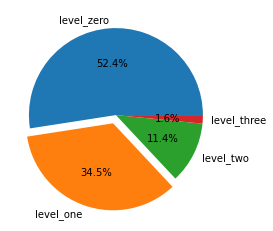

In [43]:
suject1=['level_zero','level_one','level_two','level_three']
exp=[0,0.1,0,0]
plt.pie(df3,labels=suject1,autopct='%2.1f%%',explode=exp)
plt.show()

**Best unpaid course according to subscribers**

In [44]:
df_unpaid=df[df['is_paid']==0]
df.loc[df_unpaid['num_subscribers'].idxmax()]

course_id                                                               41295
course_title                             Learn HTML5 Programming From Scratch
url                         https://www.udemy.com/learn-html5-programming-...
is_paid                                                                     0
price                                                                       0
num_subscribers                                                        268923
num_reviews                                                              8629
num_lectures                                                               45
level                                                                       0
content_duration                                                         10.5
published_timestamp                                      2013-02-14T07:03:41Z
subject                                                       Web Development
per_course_total_revenue                                        

In [50]:
## Highest paid course according to subscribers
paid=df[df['is_paid']==1]
paid.loc[paid[paid['subject']=='Web Development']['per_course_total_revenue'].idxmax()]

course_id                                                              625204
course_title                                       The Web Developer Bootcamp
url                         https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                                     1
price                                                                     200
num_subscribers                                                        121584
num_reviews                                                             27445
num_lectures                                                              342
level                                                                       0
content_duration                                                           43
published_timestamp                                      2015-11-02T21:13:27Z
subject                                                       Web Development
per_course_total_revenue                                        